In [10]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Connessione al database
conn = sqlite3.connect('tutorial.db')

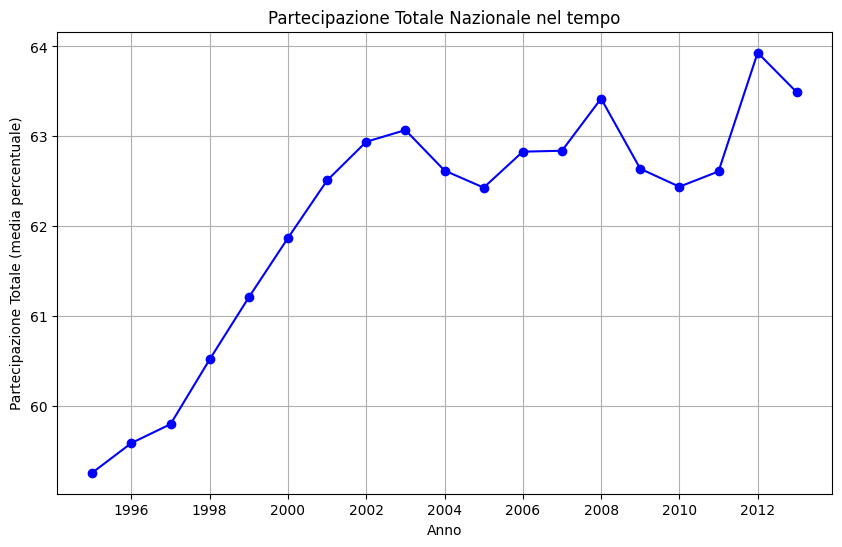

In [7]:
# Carica i dati dalla tabella partecipazione_totale_nazionale in un DataFrame
df = pd.read_sql_query("SELECT * FROM partecipazione_totale_nazionale ORDER BY Anno", conn)

# Controlla i dati caricati
#print(df.head())

# Crea il grafico a linea: anno sull'asse x, partecipazione_totale sull'asse y
plt.figure(figsize=(10, 6))
#print(df['Anno'].dtype)
plt.plot(df['Anno'], df['Percentuale'], marker='o', linestyle='-', color='b')

# Aggiungi titolo e etichette agli assi
plt.title('Partecipazione Totale Nazionale nel tempo')
plt.xlabel('Anno')
plt.ylabel('Partecipazione Totale (media percentuale)')

# Forza gli anni interi sull'asse x
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Mostra griglia per maggiore leggibilità
plt.grid(True)

# Mostra il grafico
plt.show()

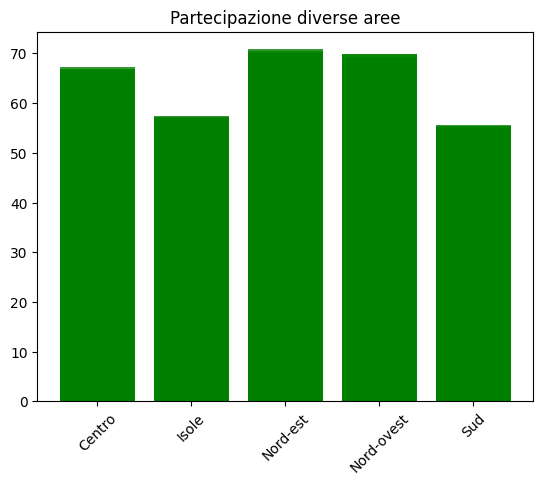

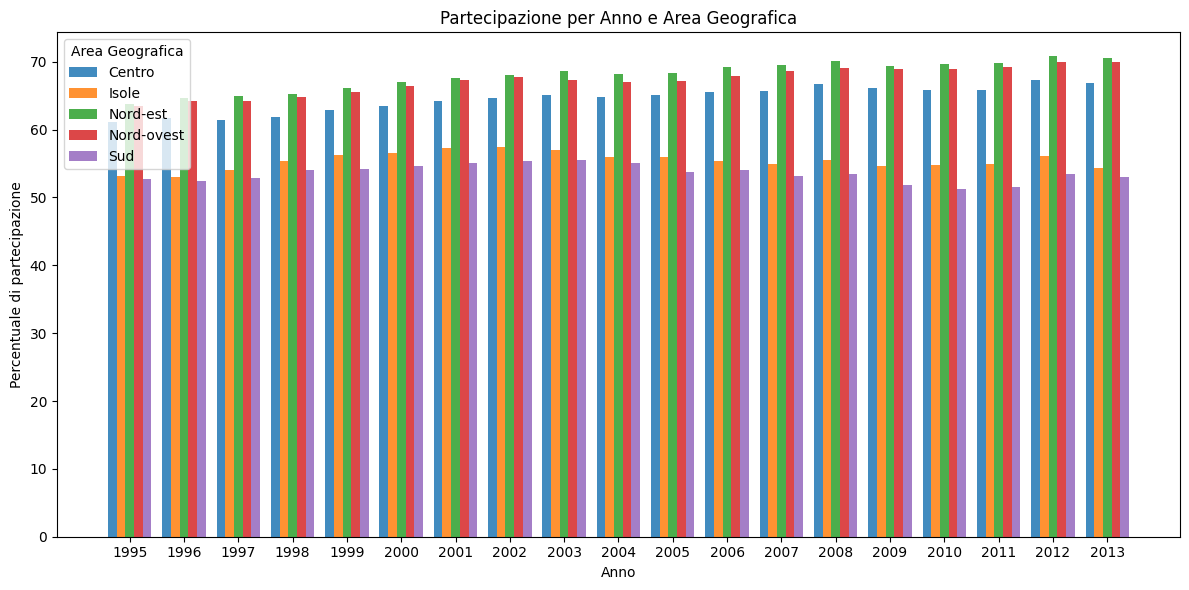

In [16]:
df = pd.read_sql_query("SELECT * FROM partecipazione_totale_aree ORDER BY Anno", conn)

plt.bar(df['area_geografica'], df['Percentuale'],  color="green", alpha=0.8, label="dati")

# definisce l'inclinzaione delle labels su
plt.xticks(rotation=45)

plt.title("Partecipazione diverse aree")
plt.show()


"""
La pivot serve per riorganizzare i dati così:

Anno	Centro	Isole	Nord-est	Nord-ovest	Sud
1996	60.0	45.0	  61.0	       62.5    50.0
2001	...	    ...	       ...	       ...	    ...
"""
df_pivot = df.pivot(index='Anno', columns='area_geografica', values='Percentuale')

anni = df_pivot.index.tolist()       # es: [1996, 2001, 2006]
aree = df_pivot.columns.tolist()     # es: ['Centro', 'Isole', 'Nord-est', 'Nord-ovest', 'Sud']
x = np.arange(len(anni))            # x = [0, 1, 2, ...]
bar_width = 0.8 / len(aree)         # larghezza di ogni barra

# Crea il grafico
plt.figure(figsize=(12, 6))

# Cicla ogni area e disegna le barre
for i, area in enumerate(aree):
    valori = df_pivot[area].values  # valori percentuali per ogni anno
    plt.bar(x + i * bar_width, valori, width=bar_width, label=area, alpha=0.85)

# Etichette
plt.xticks(x + bar_width * (len(aree)-1)/2, anni)
plt.xlabel("Anno")
plt.ylabel("Percentuale di partecipazione")
plt.title("Partecipazione per Anno e Area Geografica")
plt.legend(title="Area Geografica")
plt.tight_layout()
plt.show()